# UniNa - Machine Learning 22/23 - MiniContest n2
---

## Data preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

### raw data

In [2]:
df_raw = pd.read_excel("Training_raw.xlsx")

/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [3]:
df_raw. head()

,second,val_0,val_1,val_2,val_3,val_4,val_5
0,0,41,49,95,120,47,46
1,0,41,49,95,120,47,46
2,0,41,49,95,121,48,47
3,0,41,49,95,121,47,47
4,0,41,49,95,121,47,47


In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567296 entries, 0 to 567295
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   second  567296 non-null  int64
 1   val_0   567296 non-null  int64
 2   val_1   567296 non-null  int64
 3   val_2   567296 non-null  int64
 4   val_3   567296 non-null  int64
 5   val_4   567296 non-null  int64
 6   val_5   567296 non-null  int64
dtypes: int64(7)
memory usage: 30.3 MB


In [5]:
df_raw['second'].value_counts()

634    935
63     878
42     875
327    805
71     748
      ... 
206    136
817    114
266     53
511     45
0       29
Name: second, Length: 1002, dtype: int64

### preprocessed data

In [6]:
df_prep = pd.read_excel("Training_preprocessed.xlsx")

/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [7]:
df_prep.head()

,second,val_0_min,val_1_min,val_2_min,val_3_min,val_4_min,val_5_min,val_0_max,val_1_max,val_2_max,...,val_3_std,val_4_std,val_5_std,val_0_var,val_1_var,val_2_var,val_3_var,val_4_var,val_5_var,class
0,0,41,49,95,120,47,46,41,50,96,...,0.470824,0.384426,0.435494,0.000000,0.147783,0.123153,0.221675,0.147783,0.189655,0.00
1,1,18,19,18,10,14,17,46,76,103,...,38.948626,7.553299,3.295951,5.233212,34.764129,697.845107,1516.995484,57.052327,10.863294,0.10
2,2,23,32,15,11,16,31,48,65,98,...,40.252709,4.550546,1.860322,3.213855,18.106360,691.942503,1620.280581,20.707469,3.460800,0.29
3,3,26,25,19,15,16,32,48,70,102,...,39.295043,5.509494,2.184437,2.449684,27.190514,650.722495,1544.100420,30.354529,4.771767,0.48
4,4,23,30,20,12,19,33,46,69,108,...,40.876464,5.202366,1.715481,2.499633,23.186358,732.476140,1670.885299,27.064610,2.942875,0.68


In [8]:
df_prep.isnull().sum()

second        0
val_0_min     0
val_1_min     0
val_2_min     0
val_3_min     0
val_4_min     0
val_5_min     0
val_0_max     0
val_1_max     0
val_2_max     0
val_3_max     0
val_4_max     0
val_5_max     0
val_0_mean    0
val_1_mean    0
val_2_mean    0
val_3_mean    0
val_4_mean    0
val_5_mean    0
val_0_med     0
val_1_med     0
val_2_med     0
val_3_med     0
val_4_med     0
val_5_med     0
val_0_sum     0
val_1_sum     0
val_2_sum     0
val_3_sum     0
val_4_sum     0
val_5_sum     0
val_0_std     0
val_1_std     0
val_2_std     0
val_3_std     0
val_4_std     0
val_5_std     0
val_0_var     0
val_1_var     0
val_2_var     0
val_3_var     0
val_4_var     0
val_5_var     0
class         0
dtype: int64

In [9]:
df_prep_drop = df_prep.drop(['second', 'class'], axis=1)

<AxesSubplot: >

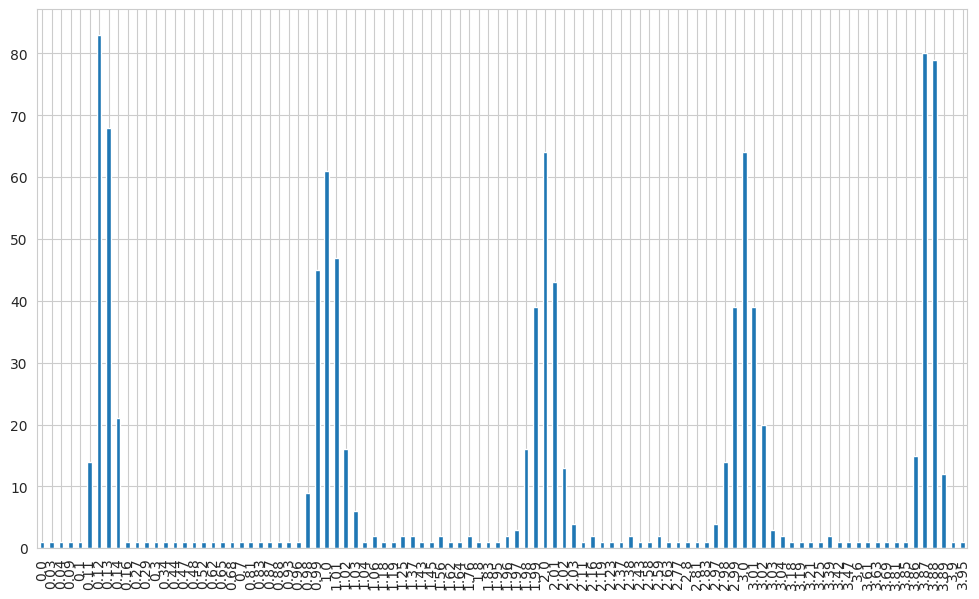

In [10]:
classes = pd.value_counts(df_prep["class"], sort=True).sort_index()
classes.plot(kind="bar", figsize=(12,7))

<AxesSubplot: >

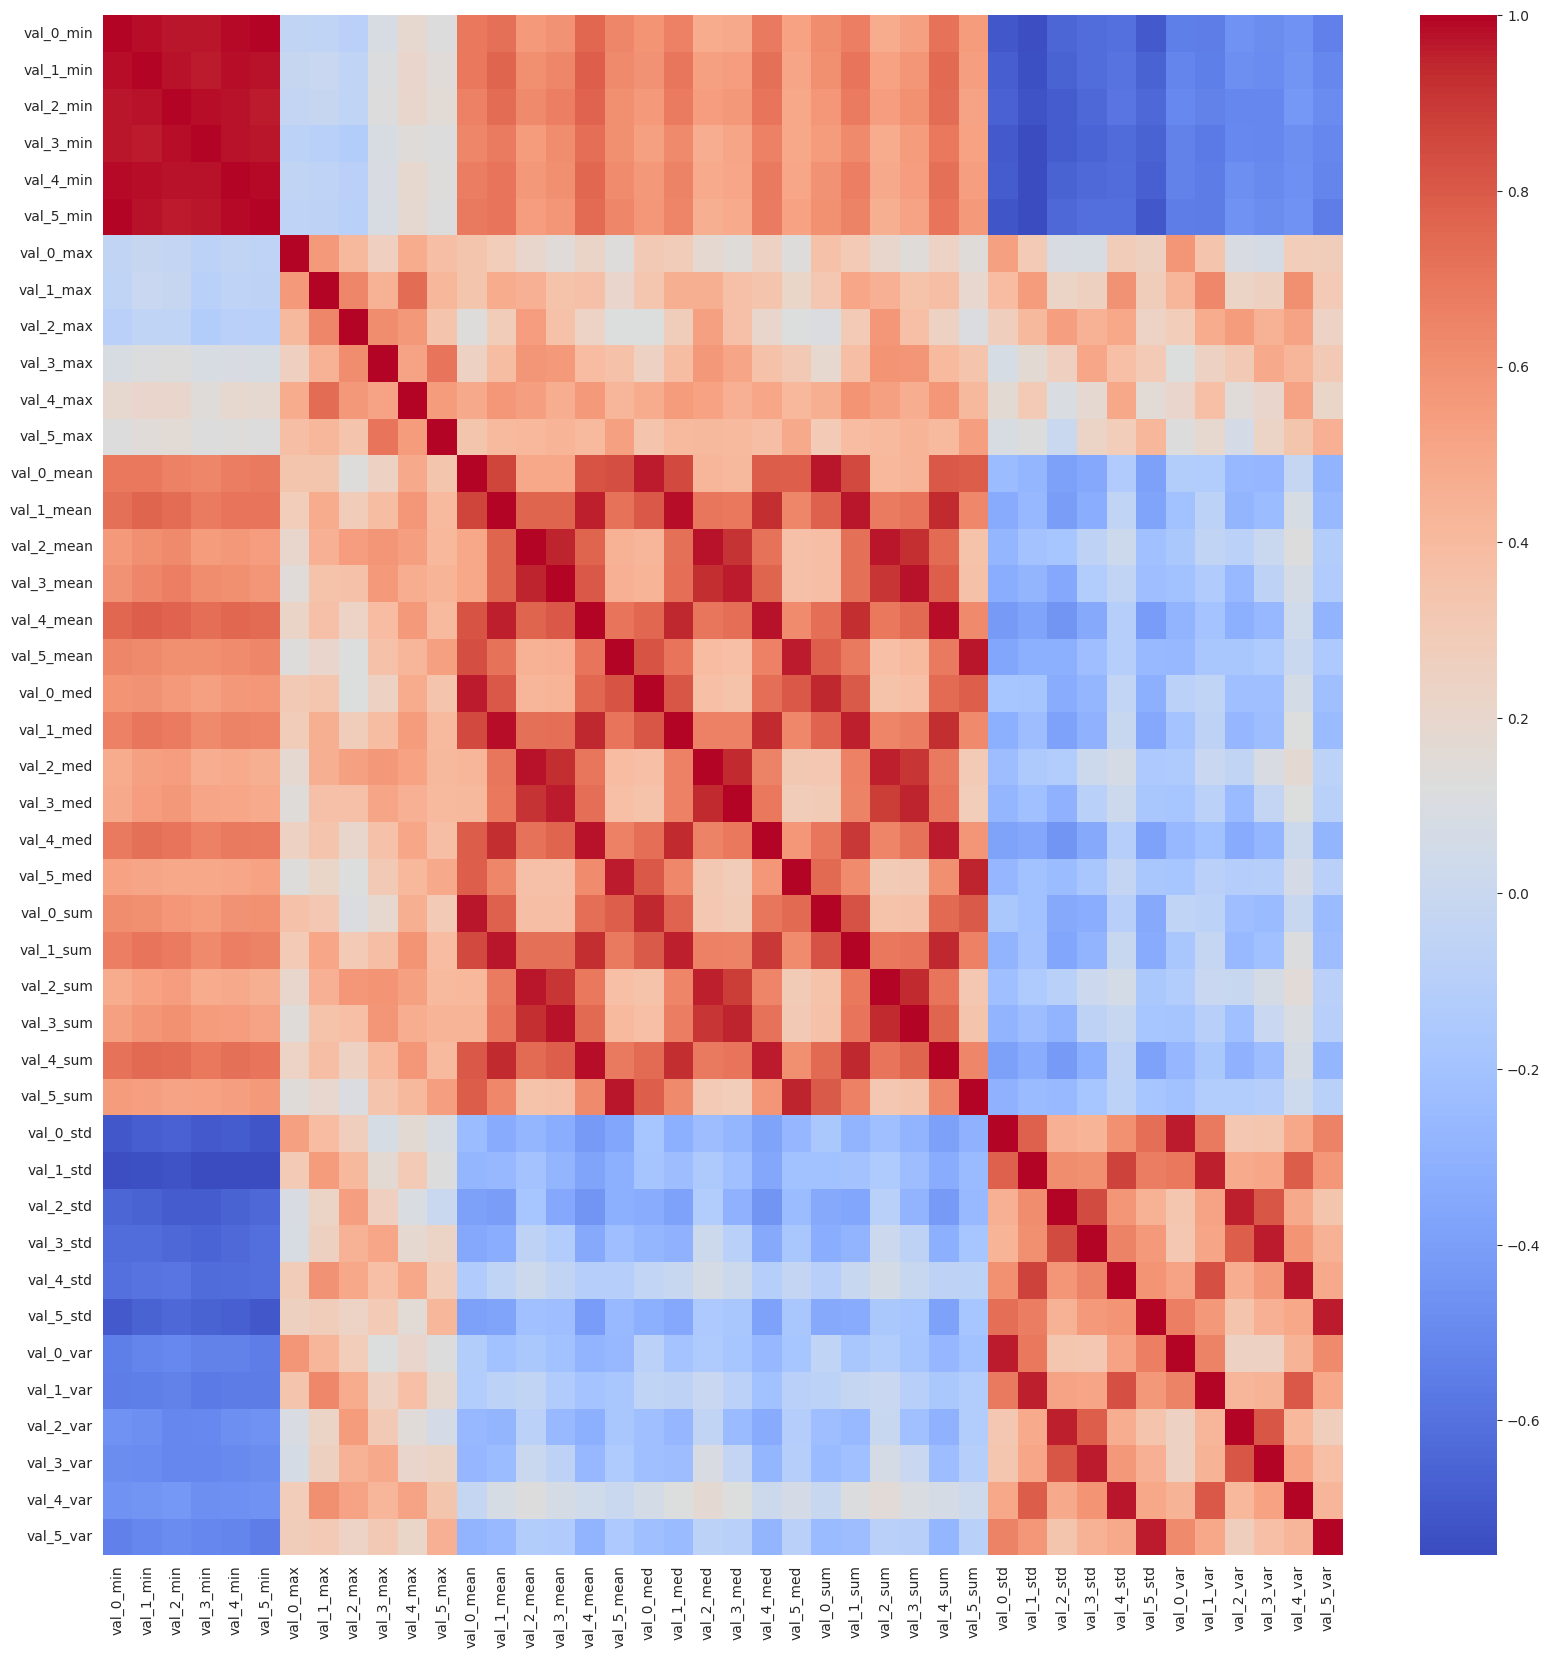

In [11]:
plt.figure(figsize=(20,20))
sns.heatmap(df_prep_drop.corr(), cmap='coolwarm')

## Scaling data

In [12]:
from sklearn.preprocessing import RobustScaler

In [13]:
scaler = RobustScaler()
scaler.fit(df_prep_drop)
scaled_feat = scaler.fit_transform(df_prep_drop)

In [14]:
X = pd.DataFrame(scaled_feat, columns=df_prep_drop.columns)
X.head()

,val_0_min,val_1_min,val_2_min,val_3_min,val_4_min,val_5_min,val_0_max,val_1_max,val_2_max,val_3_max,...,val_2_std,val_3_std,val_4_std,val_5_std,val_0_var,val_1_var,val_2_var,val_3_var,val_4_var,val_5_var
0,5.333333,3.9,6.071429,14.000,4.111111,4.111111,-2.457831,-1.76,-0.375000,-2.88,...,-0.840814,-0.707368,-0.665100,-0.801715,-0.456197,-0.594712,-0.444281,-0.430601,-0.346741,-0.473730
1,1.500000,0.9,0.571429,0.250,0.444444,0.888889,-2.216867,-0.72,-0.083333,-2.76,...,0.459148,-0.022648,-0.527824,-0.743267,-0.448266,-0.513511,0.602714,-0.026823,-0.330740,-0.470517
2,2.333333,2.2,0.357143,0.375,0.666667,2.444444,-2.120482,-1.16,-0.291667,-2.72,...,0.453565,0.000559,-0.585323,-0.772601,-0.451326,-0.552586,0.593856,0.000672,-0.340960,-0.472745
3,2.833333,1.5,0.642857,0.875,0.666667,2.555556,-2.120482,-0.96,-0.125000,-2.64,...,0.413889,-0.016483,-0.566961,-0.765979,-0.452484,-0.531277,0.532002,-0.019607,-0.338247,-0.472350
4,2.333333,2.0,0.714286,0.500,1.000000,2.666667,-2.216867,-1.00,0.125000,-2.64,...,0.491442,0.011659,-0.572842,-0.775561,-0.452408,-0.540669,0.654681,0.014144,-0.339172,-0.472901


## Train test split and feature selection

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import AdaBoostRegressor

In [16]:
data = df_prep_drop
X = X
y = df_prep["class"]

In [17]:
abr = AdaBoostRegressor(random_state=42, n_estimators=50).fit(X, y)

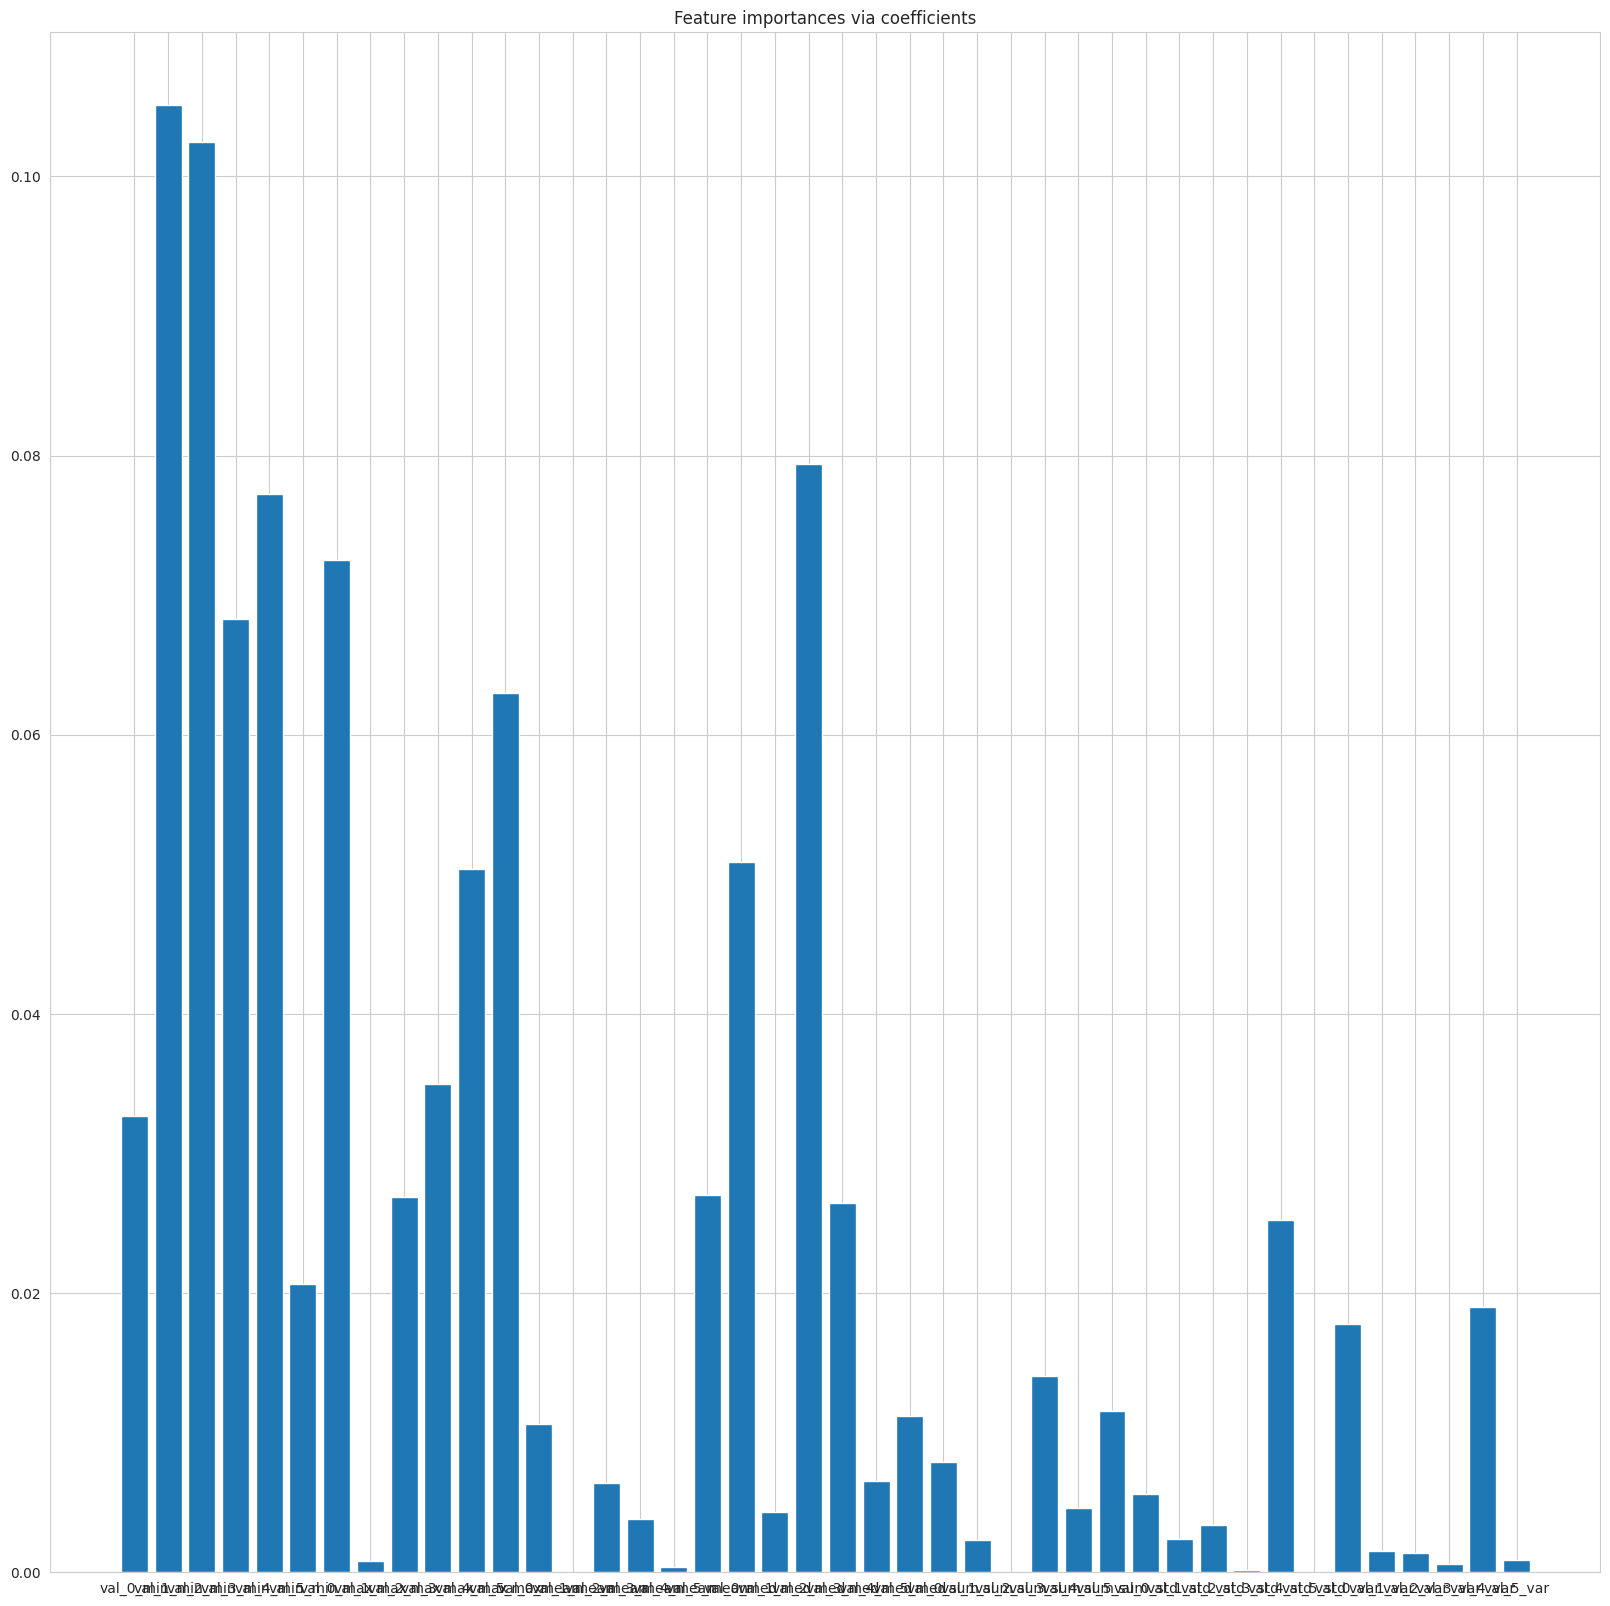

In [18]:
importance = np.abs(abr.feature_importances_)
feature_names = data.columns
plt.figure(figsize=(20, 20))
plt.bar(height=importance, x=feature_names)
plt.title("Feature importances via coefficients")
plt.show()

In [19]:
threshold = 0.02

In [20]:
len(importance[importance > threshold])

16

In [21]:
selector = SelectFromModel(estimator=abr, threshold=threshold, prefit=True)

In [22]:
X_new = pd.DataFrame(data=selector.transform(X), columns=feature_names[selector.get_support()])

/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42, shuffle=True)

In [24]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (701, 16)
X_test shape: (301, 16)
y_train shape: (701,)
y_test shape: (301,)


### Linear Regression

In [25]:
models = []

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
lm = LinearRegression()

In [28]:
lm.fit(X_train, y_train)

LinearRegression()

In [29]:
pred = lm.predict(X_test)

In [30]:
from sklearn.metrics import mean_absolute_error

In [31]:
mae_lm = mean_absolute_error(y_test, pred)
print(f"MAE: {mae_lm}")

MAE: 0.4049414718864059


In [32]:
models.append((lm, mae_lm))

### PLS Regression

In [33]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import GridSearchCV

In [34]:
pls = PLSRegression()

In [35]:
parameters = {
    'n_components' : [i for i in range(1, 16)],
}

In [36]:
grid_search = GridSearchCV(estimator=pls,
                           param_grid=parameters,
                           n_jobs=-1,
                           cv=5,
                           scoring='neg_mean_absolute_error',
                           error_score='raise')

In [37]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise', estimator=PLSRegression(), n_jobs=-1,
             param_grid={'n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15]},
             scoring='neg_mean_absolute_error')

In [38]:
print(grid_search.best_params_)
pls_best = grid_search.best_estimator_

{'n_components': 5}


In [39]:
pred = pls_best.predict(X_test)

In [40]:
mae_pls = mean_absolute_error(y_test, pred)
print(f"MAE: {mae_pls}")

MAE: 0.39414228450164596


In [41]:
models.append((pls_best, mae_pls))

### Ridge Regression

In [42]:
from sklearn.linear_model import Ridge

In [43]:
ridge = Ridge()

In [44]:
parameters = {
    'alpha' : (0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 50, 100),
    'solver': ('svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'),
}

In [45]:
grid_search = GridSearchCV(estimator=ridge,
                           param_grid=parameters,
                           n_jobs=-1,
                           cv=5,
                           scoring='neg_mean_absolute_error',
                           error_score='raise')

In [46]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise', estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': (1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 50,
                                   100),
                         'solver': ('svd', 'cholesky', 'lsqr', 'sparse_cg',
                                    'sag', 'saga')},
             scoring='neg_mean_absolute_error')

In [47]:
print(grid_search.best_params_)
ridge_best = grid_search.best_estimator_

{'alpha': 1e-05, 'solver': 'svd'}


In [48]:
pred = ridge_best.predict(X_test)

In [49]:
mae_ridge = mean_absolute_error(y_test, pred)
print(f"MAE: {mae_ridge}")

MAE: 0.40494147581193973


In [50]:
models.append((ridge_best, mae_ridge))

### Lasso Regression

In [51]:
from sklearn.linear_model import Lasso

In [52]:
lasso = Lasso(max_iter=3000)

In [53]:
parameters = {
    'alpha' : (0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 50, 100),
    'selection': ('cyclic', 'random'),
}

In [54]:
grid_search = GridSearchCV(estimator=lasso,
                           param_grid=parameters,
                           n_jobs=-1,
                           cv=5,
                           scoring='neg_mean_absolute_error',
                           error_score='raise')

In [55]:
grid_search.fit(X_train, y_train)

/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.968e+00, tolerance: 1.020e-01
  model = cd_fast.enet_coordinate_descent(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.624e+01, tolerance: 1.043e-01
  model = cd_fast.enet_coordinate_descent(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective 

GridSearchCV(cv=5, error_score='raise', estimator=Lasso(max_iter=3000),
             n_jobs=-1,
             param_grid={'alpha': (1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1,
                                   10, 50, 100),
                         'selection': ('cyclic', 'random')},
             scoring='neg_mean_absolute_error')

In [56]:
print(grid_search.best_params_)
lasso_best = grid_search.best_estimator_

{'alpha': 0.001, 'selection': 'cyclic'}


In [57]:
pred = lasso_best.predict(X_test)

In [58]:
mae_lasso = mean_absolute_error(y_test, pred)
print(f"MAE: {mae_lasso}")

MAE: 0.404480356554241


In [59]:
models.append((lasso_best, mae_lasso))

### ElasticNet Boosting Regression

In [60]:
from sklearn.linear_model import ElasticNet

In [61]:
elne = ElasticNet(max_iter=1000)

In [62]:
parameters = {
    'alpha' : (0.0001, 0.001, 0.01, 0.1, 1, 10, 100),
    'l1_ratio': (0.0, 0.1, 1.0),
}

In [63]:
grid_search = GridSearchCV(estimator=elne,
                           param_grid=parameters,
                           n_jobs=-1,
                           cv=5,
                           scoring='neg_mean_absolute_error',
                           error_score='raise')

In [64]:
grid_search.fit(X_train, y_train)

/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.407e+01, tolerance: 1.020e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.628e+01, tolerance: 1.012e-01 Linear regression models with null wei

/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.345e+02, tolerance: 1.037e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.178e+02, tolerance: 1.031e-01 Linear regression models with null wei

GridSearchCV(cv=5, error_score='raise', estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': (0.0001, 0.001, 0.01, 0.1, 1, 10, 100),
                         'l1_ratio': (0.0, 0.1, 1.0)},
             scoring='neg_mean_absolute_error')

In [65]:
print(grid_search.best_params_)
elne_best = grid_search.best_estimator_

{'alpha': 0.001, 'l1_ratio': 1.0}


In [66]:
pred = elne_best.predict(X_test)

In [67]:
mae_elne = mean_absolute_error(y_test, pred)
print(f"MAE: {mae_elne}")

MAE: 0.404480356554241


In [68]:
models.append((elne_best, mae_elne))

### Gradient Boosting Regression

In [69]:
from sklearn.ensemble import GradientBoostingRegressor

In [70]:
gbr = GradientBoostingRegressor()

In [71]:
parameters = {
    'max_depth': (750, 1000, 1250),
    'alpha' : (0.0001, 0.001, 0.01),
    'max_features': (3, 4, 5),
    'min_samples_leaf': (2, 3, 4),
    'min_samples_split': (5, 10, 15),
    'n_estimators': (250, 500, 750),
}

In [72]:
grid_search = GridSearchCV(estimator=gbr,
                           param_grid=parameters,
                           n_jobs=-1,
                           cv=5,
                           scoring='neg_mean_absolute_error',
                           error_score='raise')

In [73]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise', estimator=GradientBoostingRegressor(),
             n_jobs=-1,
             param_grid={'alpha': (0.0001, 0.001, 0.01),
                         'max_depth': (750, 1000, 1250),
                         'max_features': (3, 4, 5),
                         'min_samples_leaf': (2, 3, 4),
                         'min_samples_split': (5, 10, 15),
                         'n_estimators': (250, 500, 750)},
             scoring='neg_mean_absolute_error')

In [74]:
print(grid_search.best_params_)
gbr_best = grid_search.best_estimator_

{'alpha': 0.0001, 'max_depth': 1000, 'max_features': 5, 'min_samples_leaf': 4, 'min_samples_split': 15, 'n_estimators': 250}


In [75]:
pred = gbr_best.predict(X_test)

In [76]:
mae_gbr = mean_absolute_error(y_test, pred)
print(f"MAE: {mae_gbr}")

MAE: 0.18861534524711543


In [77]:
models.append((gbr_best, mae_gbr))

### Stochastic Gradient Descent Regression

In [78]:
from sklearn.linear_model import SGDRegressor

In [79]:
sgd = SGDRegressor()

In [80]:
parameters = {
    'alpha': (0.1, 0.05, 0.01, 0.005, 0.001, 0.0001), 
    'loss': ('huber', 'epsilon_insensitive', 'squared_error', 'squared_epsilon_insensitive'),
    'penalty': ('l2', 'l1', 'elasticnet'),
    'l1_ratio': (0.25, 0.5, 0.75, 1),
    'learning_rate': ('constant', 'optimal', 'invscaling', 'adaptive'),
}

In [81]:
grid_search = GridSearchCV(estimator=sgd,
                           param_grid=parameters,
                           n_jobs=-1,
                           cv=5,
                           scoring='neg_mean_absolute_error',
                           error_score='raise')

In [82]:
grid_search.fit(X_train, y_train)

/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_mo

/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_mo

/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_mo

/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_mo

/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_mo

/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_mo

/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_mo

/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_mo

/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_mo

/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_mo

/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_mo

/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_mo

/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_mo

/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_mo

/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_mo

/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_mo

/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_mo

/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_mo

/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_mo

/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_mo

/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_mo

/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_mo

/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_mo

/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_mo

/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_mo

/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_mo

/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_mo

/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_mo

/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_mo

/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_mo

/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_mo

/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_mo

/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_mo

/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_mo

/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_mo

/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_mo

/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_mo

/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_mo

/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_mo

/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_mo

/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/linear_mo

GridSearchCV(cv=5, error_score='raise', estimator=SGDRegressor(), n_jobs=-1,
             param_grid={'alpha': (0.1, 0.05, 0.01, 0.005, 0.001, 0.0001),
                         'l1_ratio': (0.25, 0.5, 0.75, 1),
                         'learning_rate': ('constant', 'optimal', 'invscaling',
                                           'adaptive'),
                         'loss': ('huber', 'epsilon_insensitive',
                                  'squared_error',
                                  'squared_epsilon_insensitive'),
                         'penalty': ('l2', 'l1', 'elasticnet')},
             scoring='neg_mean_absolute_error')

In [83]:
print(grid_search.best_params_)
sgd_best = grid_search.best_estimator_

{'alpha': 0.01, 'l1_ratio': 1, 'learning_rate': 'adaptive', 'loss': 'epsilon_insensitive', 'penalty': 'l1'}


In [84]:
pred = sgd_best.predict(X_test)

In [85]:
mae_sgd = mean_absolute_error(y_test, pred)
print(f"MAE: {mae_sgd}")

MAE: 0.40220569157273395


In [86]:
models.append((sgd_best, mae_sgd))

### Bayesian Ridge Regression

In [87]:
from sklearn.linear_model import BayesianRidge

In [88]:
bard = BayesianRidge()

In [89]:
parameters = {
    'alpha_init': (0.1, 0.5, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.9),
    'lambda_init': (1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-9)
}

In [90]:
grid_search = GridSearchCV(estimator=bard,
                           param_grid=parameters,
                           n_jobs=-1,
                           cv=5,
                           scoring='neg_mean_absolute_error',
                           error_score='raise')

In [91]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise', estimator=BayesianRidge(), n_jobs=-1,
             param_grid={'alpha_init': (0.1, 0.5, 1, 1.1, 1.2, 1.3, 1.4, 1.5,
                                        1.9),
                         'lambda_init': (0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06,
                                         1e-09)},
             scoring='neg_mean_absolute_error')

In [92]:
print(grid_search.best_params_)
bard_best = grid_search.best_estimator_

{'alpha_init': 1.4, 'lambda_init': 1e-09}


In [93]:
pred = bard_best.predict(X_test)

In [94]:
mae_bard = mean_absolute_error(y_test, pred)
print(f"MAE: {mae_bard}")

MAE: 0.40652353759287846


In [95]:
models.append((bard_best, mae_bard))

### Decision Tree Regressor

In [96]:
from sklearn.tree import DecisionTreeRegressor

In [97]:
dtree = DecisionTreeRegressor()

In [98]:
parameters = {
    'criterion': ('squared_error', 'friedman_mse', 'absolute_error', 'poisson'),
    'splitter': ('best', 'random'),
    'max_depth': (500, 1000, 1500, 2000),
    'max_features': (3, 4, 5, 6),
    'min_samples_leaf': (1, 2, 3),
    'min_samples_split': (3, 6, 9, 12),
}

In [99]:
grid_search = GridSearchCV(estimator=dtree,
                           param_grid=parameters,
                           n_jobs=-1,
                           cv=5,
                           scoring='neg_mean_absolute_error',
                           error_score='raise')

In [100]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise', estimator=DecisionTreeRegressor(),
             n_jobs=-1,
             param_grid={'criterion': ('squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'),
                         'max_depth': (500, 1000, 1500, 2000),
                         'max_features': (3, 4, 5, 6),
                         'min_samples_leaf': (1, 2, 3),
                         'min_samples_split': (3, 6, 9, 12),
                         'splitter': ('best', 'random')},
             scoring='neg_mean_absolute_error')

In [101]:
print(grid_search.best_params_)
dtree_best = grid_search.best_estimator_

{'criterion': 'squared_error', 'max_depth': 1500, 'max_features': 6, 'min_samples_leaf': 1, 'min_samples_split': 3, 'splitter': 'best'}


In [102]:
pred = dtree_best.predict(X_test)

In [103]:
mae_dtree = mean_absolute_error(y_test, pred)
print(f"MAE: {mae_dtree}")

MAE: 0.2757142857142857


In [104]:
models.append((dtree_best, mae_dtree))

### k-Nearest Neighbors Regressor

In [105]:
from sklearn.neighbors import KNeighborsRegressor

In [106]:
error_rate = []
for i in range(1, 50):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

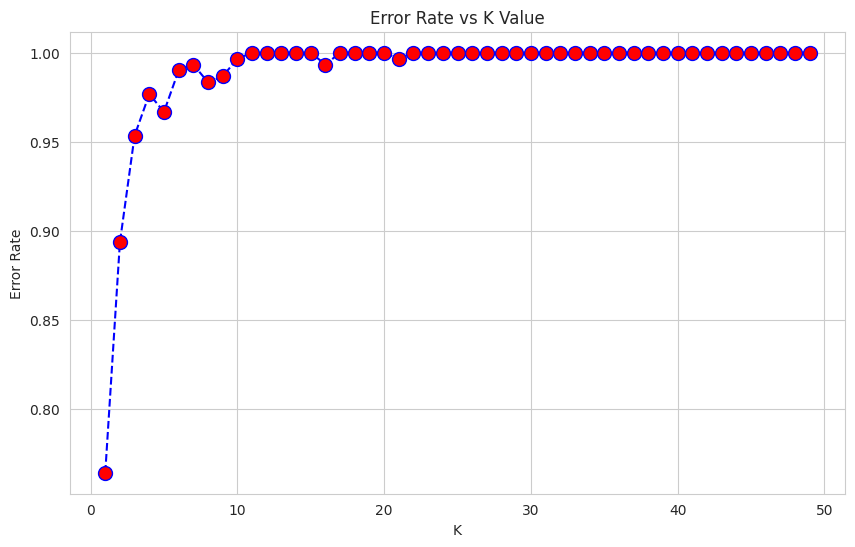

In [107]:
plt.figure(figsize=(10,6))
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.plot(range(1, 50), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)

In [108]:
knn = KNeighborsRegressor(n_neighbors=1)

In [109]:
parameters = {
    'weights': ('uniform', 'distance'),
    'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
    'leaf_size': (1, 2, 3, 4, 5),
    'p': (1, 2, 3),
    'metric': ('minkowski', 'chebyshev'),
}

In [110]:
grid_search = GridSearchCV(estimator=knn,
                           param_grid=parameters,
                           n_jobs=-1,
                           cv=5,
                           scoring='neg_mean_absolute_error',
                           error_score='raise')

In [111]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
             estimator=KNeighborsRegressor(n_neighbors=1), n_jobs=-1,
             param_grid={'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
                         'leaf_size': (1, 2, 3, 4, 5),
                         'metric': ('minkowski', 'chebyshev'), 'p': (1, 2, 3),
                         'weights': ('uniform', 'distance')},
             scoring='neg_mean_absolute_error')

In [112]:
print(grid_search.best_params_)
knn_best = grid_search.best_estimator_

{'algorithm': 'auto', 'leaf_size': 1, 'metric': 'minkowski', 'p': 1, 'weights': 'uniform'}


In [113]:
pred = knn_best.predict(X_test)

In [114]:
mae_knn = mean_absolute_error(y_test, pred)
print(f"MAE: {mae_knn}")

MAE: 0.1238538205980066


In [115]:
models.append((knn_best, mae_knn))

### SVR

In [116]:
from sklearn.svm import SVR

In [117]:
svr = SVR()

In [121]:
parameters = {
    'kernel': ('linear', 'poly', 'rbf', 'sigmoid'),
    'gamma': (0.05, 0.1, 0.5),
    'C': (5, 10, 15),
}

In [122]:
grid_search = GridSearchCV(estimator=svr,
                           param_grid=parameters,
                           n_jobs=-1,
                           cv=5,
                           scoring='neg_mean_absolute_error',
                           error_score='raise')

In [ ]:
grid_search.fit(X_train, y_train)

In [ ]:
print(grid_search.best_params_)
svr_best = grid_search.best_estimator_

In [ ]:
pred = svr_best.predict(X_test)

In [ ]:
mae_svr = mean_absolute_error(y_test, pred)
print(f"MAE: {mae_svr}")

In [ ]:
models.append((svr_best, mae_svr))

### Multi-layer Perceptron Regressor

In [124]:
from sklearn.neural_network import MLPRegressor

In [125]:
mlp = MLPRegressor(max_iter=5000)

In [126]:
parameters = {
    "activation" : ("identity", "logistic", "tanh", "relu"),
    "solver" : ("lbfgs", "sgd", "adam"),
    "alpha": (0.1, 0.5),
    "hidden_layer_sizes" : ((50,100,50), (100,))
}

In [129]:
grid_search = GridSearchCV(estimator=mlp,
                           param_grid=parameters,
                           n_jobs=-1,
                           cv=5,
                           scoring='neg_mean_absolute_error',
                           error_score='raise')

In [ ]:
grid_search.fit(X_train, y_train)

In [ ]:
print(grid_search.best_params_)
mlp_best = grid_search.best_estimator_

In [ ]:
pred = mlp_best.predict(X_test)

In [ ]:
mae_mlp = mean_absolute_error(y_test, pred)
print(f"MAE: {mae_mlp}")

In [ ]:
models.append((mlp_best, mae_mlp))

## Evaluating choosen model on a test data

### best model

In [131]:
models

[(LinearRegression(), 0.4049414718864059),
 (PLSRegression(n_components=5), 0.39414228450164596),
 (Ridge(alpha=1e-05, solver='svd'), 0.40494147581193973),
 (Lasso(alpha=0.001, max_iter=3000), 0.404480356554241),
 (ElasticNet(alpha=0.001, l1_ratio=1.0), 0.404480356554241),
 (GradientBoostingRegressor(alpha=0.0001, max_depth=1000, max_features=5,
                            min_samples_leaf=4, min_samples_split=15,
                            n_estimators=250),
  0.18861534524711543),
 (SGDRegressor(alpha=0.01, l1_ratio=1, learning_rate='adaptive',
               loss='epsilon_insensitive', penalty='l1'),
  0.40220569157273395),
 (BayesianRidge(alpha_init=1.4, lambda_init=1e-09), 0.40652353759287846),
 (DecisionTreeRegressor(max_depth=1500, max_features=6, min_samples_split=3),
  0.2757142857142857),
 (KNeighborsRegressor(leaf_size=1, n_neighbors=1, p=1), 0.1238538205980066)]

In [132]:
best_model = sorted(models, key=lambda x: x[1])[0][0]
best_model

KNeighborsRegressor(leaf_size=1, n_neighbors=1, p=1)

### raw data

In [133]:
test_df_raw = pd.read_excel("Test_raw.xlsx")

/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [134]:
test_df_raw.head()

,second,val_0,val_1,val_2,val_3,val_4,val_5
0,0,35,33,88,138,31,27
1,0,35,29,85,142,33,24
2,0,36,43,89,136,32,22
3,0,37,45,85,136,32,25
4,0,35,41,88,88,38,27


In [135]:
test_df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248012 entries, 0 to 248011
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   second  248012 non-null  int64
 1   val_0   248012 non-null  int64
 2   val_1   248012 non-null  int64
 3   val_2   248012 non-null  int64
 4   val_3   248012 non-null  int64
 5   val_4   248012 non-null  int64
 6   val_5   248012 non-null  int64
dtypes: int64(7)
memory usage: 13.2 MB


### preprocessed data

In [136]:
test_df_prep = pd.read_excel("Test_preprocessed.xlsx")

/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [137]:
test_df_prep.head()

,second,val_0_min,val_1_min,val_2_min,val_3_min,val_4_min,val_5_min,val_0_max,val_1_max,val_2_max,...,val_2_std,val_3_std,val_4_std,val_5_std,val_0_var,val_1_var,val_2_var,val_3_var,val_4_var,val_5_var
0,0,14,17,16,14,13,11,39,57,99,...,16.823652,31.716844,6.735265,3.493457,17.822167,33.775603,283.035277,1005.958219,45.363789,12.204244
1,1,6,8,12,10,7,5,37,49,96,...,18.482581,33.848272,8.878503,5.493130,28.887110,70.294392,341.605782,1145.705512,78.827813,30.174478
2,2,6,7,7,6,6,5,36,49,90,...,24.210578,38.462332,4.992304,8.337549,53.930769,51.673880,586.152110,1479.350948,24.923102,69.514726
3,3,6,6,6,5,5,5,36,37,87,...,15.784262,22.402361,3.511924,5.434497,29.958586,19.278194,249.142933,501.865769,12.333614,29.533761
4,4,6,8,11,8,7,5,34,47,96,...,20.899157,39.094312,8.958503,5.071132,25.636980,74.628700,436.774766,1528.365196,80.254780,25.716381


In [138]:
test_df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   second      420 non-null    int64  
 1   val_0_min   420 non-null    int64  
 2   val_1_min   420 non-null    int64  
 3   val_2_min   420 non-null    int64  
 4   val_3_min   420 non-null    int64  
 5   val_4_min   420 non-null    int64  
 6   val_5_min   420 non-null    int64  
 7   val_0_max   420 non-null    int64  
 8   val_1_max   420 non-null    int64  
 9   val_2_max   420 non-null    int64  
 10  val_3_max   420 non-null    int64  
 11  val_4_max   420 non-null    int64  
 12  val_5_max   420 non-null    int64  
 13  val_0_mean  420 non-null    float64
 14  val_1_mean  420 non-null    float64
 15  val_2_mean  420 non-null    float64
 16  val_3_mean  420 non-null    float64
 17  val_4_mean  420 non-null    float64
 18  val_5_mean  420 non-null    float64
 19  val_0_med   420 non-null    f

In [139]:
sec = test_df_prep['second']
test_df_prep = test_df_prep.drop('second', axis=1)

In [140]:
scaler.fit(test_df_prep)
scaled_test_feat = scaler.fit_transform(test_df_prep)

In [141]:
scaled_test_set = pd.DataFrame(scaled_test_feat, columns=test_df_prep.columns)
scaled_test_set.head()

,val_0_min,val_1_min,val_2_min,val_3_min,val_4_min,val_5_min,val_0_max,val_1_max,val_2_max,val_3_max,...,val_2_std,val_3_std,val_4_std,val_5_std,val_0_var,val_1_var,val_2_var,val_3_var,val_4_var,val_5_var
0,1.75,1.8,1.333333,2.00,1.411765,1.333333,-0.852273,-0.602410,-0.042781,-0.972222,...,0.028063,-0.181521,-0.321195,-0.896102,-0.346641,-0.442367,0.026378,-0.161052,-0.176549,-0.575794
1,-0.25,0.0,0.666667,1.00,0.000000,-0.666667,-0.897727,-0.795181,-0.106952,-1.111111,...,0.117332,-0.128576,-0.225626,-0.849235,-0.319156,-0.307901,0.115996,-0.117515,-0.136877,-0.569809
2,-0.25,-0.2,-0.166667,0.00,-0.235294,-0.666667,-0.920455,-0.795181,-0.235294,-1.277778,...,0.425563,-0.013962,-0.398915,-0.782569,-0.256948,-0.376464,0.490169,-0.013570,-0.200782,-0.556708
3,-0.25,-0.4,-0.333333,-0.25,-0.470588,-0.666667,-0.920455,-1.084337,-0.299465,-1.472222,...,-0.027868,-0.412895,-0.464926,-0.850609,-0.316495,-0.495748,-0.025479,-0.318099,-0.215707,-0.570022
4,-0.25,0.0,0.500000,0.50,0.000000,-0.666667,-0.965909,-0.843373,-0.106952,-1.111111,...,0.247371,0.001737,-0.222059,-0.859126,-0.327229,-0.291942,0.261611,0.001700,-0.135185,-0.571294


In [142]:
scaled_test_set_new = pd.DataFrame(data=selector.transform(scaled_test_set), columns=scaled_test_set.columns[selector.get_support()])

/home/szymon/Studia_AGH/Semestr_5/ML/Machine_learning_course_UNINA/venv/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [143]:
test_pred = best_model.predict(scaled_test_set_new)

In [144]:
final_pred = pd.DataFrame(data={'second': sec,
                                'RQ': pd.Series(test_pred)})
final_pred.to_csv("mini_contest_2_results.csv", index=False)